# 1- Importation et préparation des données

In [101]:
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
import statistics as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.distributions.empirical_distribution import ECDF
import os



data_temperature = pd.read_table('../data/observatoire-geneve/TG_STAID000241.txt',sep = ',',
                                names = ['SOUID','DATE','TG','Q_TG'], skiprows = range(0,20))

data_temperature.drop(data_temperature[ data_temperature['Q_TG'] == 9 ].index, inplace = True)
data_temperature['Year'] = [int(str(d)[:4]) for d in data_temperature.DATE]
data_temperature['Month'] = [int(str(d)[4:6]) for d in data_temperature.DATE]
data_temperature['Day'] = [int(str(d)[6:8]) for d in data_temperature.DATE]

#Compute the day of the year for each year
day_of_year = np.array(len(data_temperature['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_temperature.DATE]
data_temperature['Day_of_year'] = [d.timetuple().tm_yday for d in adate]
data_temperature.TG = data_temperature.TG/10.


In [102]:
df = data_temperature

# 2- Analyse exploratoire des données comme des Time Series

## 2.1- Seasonal Plot of temperature

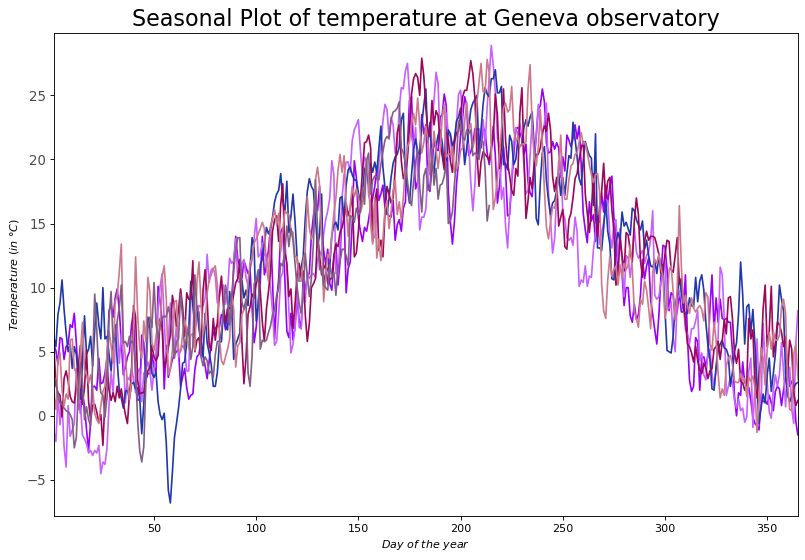

In [25]:
df1 = df[df.Year>2015]
years = df1['Year'].unique()
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)

for i, y in enumerate(years):        
    plt.plot('Day_of_year','TG',data=df1[df1.Year==y], color=mycolors[i], label=y)
        

# Decoration
plt.gca().set(xlim=(1, 365), ylim=(min(df1.TG) - 1, max(df1.TG) + 1),
              ylabel='$Temperature\ (in\ °C)$', xlabel='$Day\ of\ the\ year$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of temperature at Geneva observatory", fontsize=20)
plt.show()

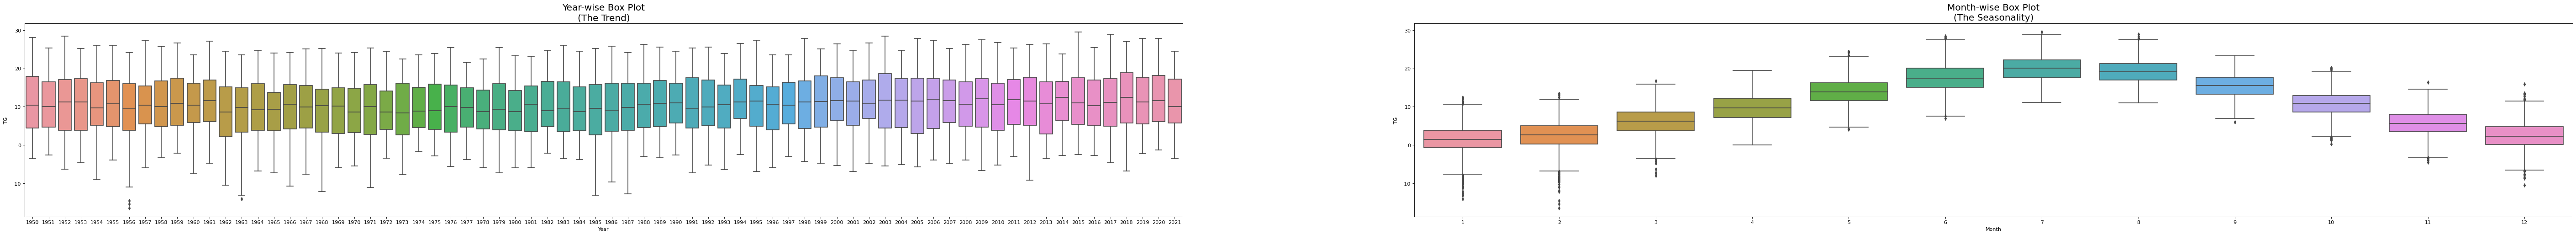

In [82]:
df1 = df[df.Year >= 1950]
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(90,7), dpi= 80)
sns.boxplot(x='Year', y='TG', data=df1, ax=axes[0])
sns.boxplot(x='Month', y='TG', data=df1)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

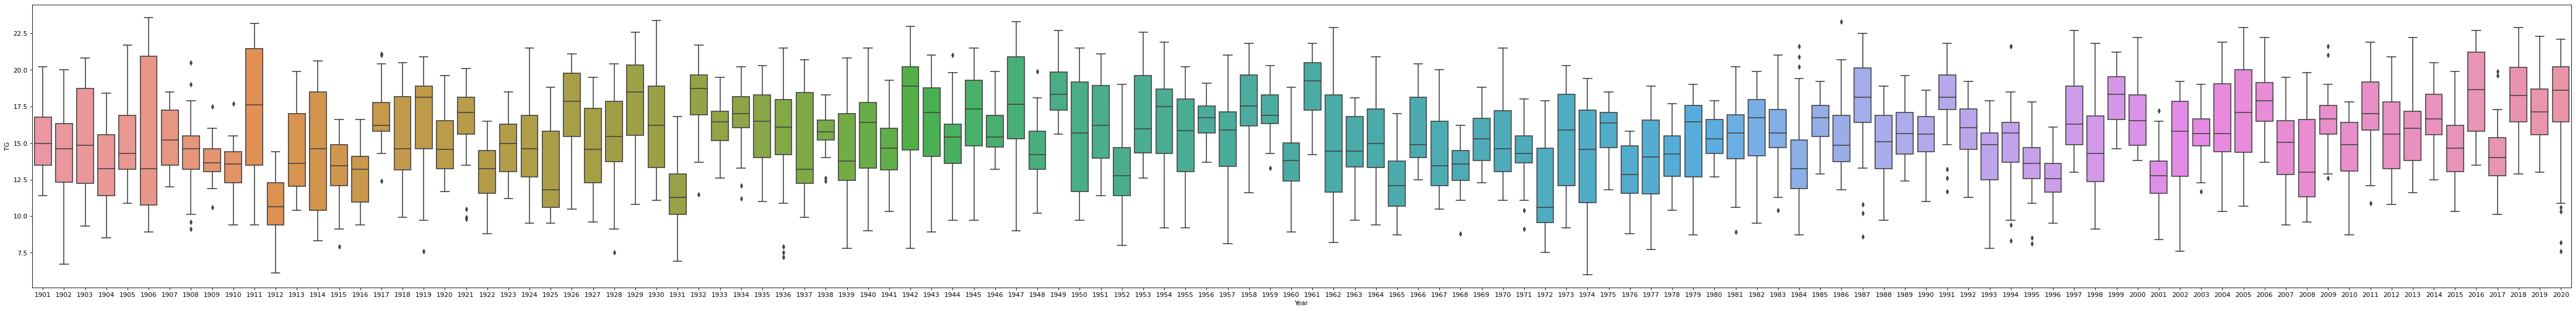

In [83]:
# Draw Plot
plt.figure(figsize=(70,8), dpi= 80)
sns.boxplot(x='Year', y='TG', data=df[df.Month == 9] )

#plt.plot(years,[st.mean(df.TG[df.Year == year]) for year in years])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

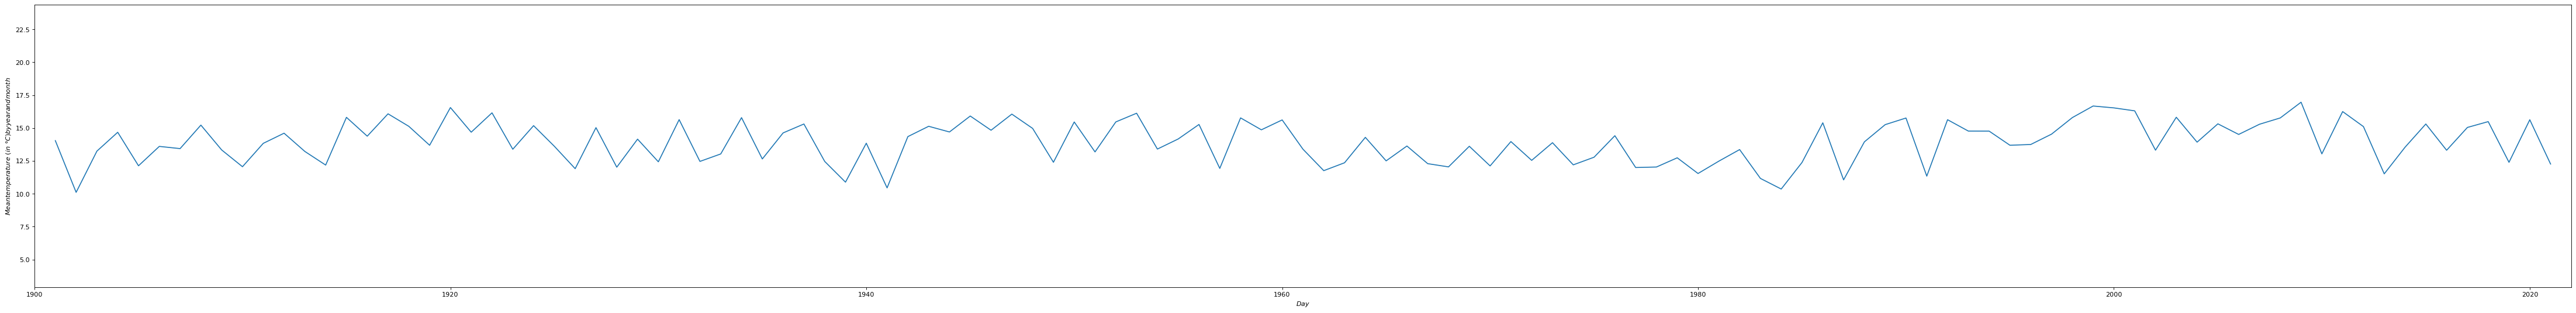

In [84]:
years = df['Year'].unique()
# Draw Plot
plt.figure(figsize=(70,8), dpi= 80)
month = 5
plt.plot(years,[st.mean(df.TG[(df.Year == year) & (df.Month == month)]) for year in years])

# Set Title
plt.gca().set(xlim=(1900, 2022), ylim=(min(df.TG[df.Month == month]), max(df.TG[df.Month == month])),
              ylabel='$Mean temperature\ (in\ °C) by year and month$', xlabel='$Day$')
plt.show()

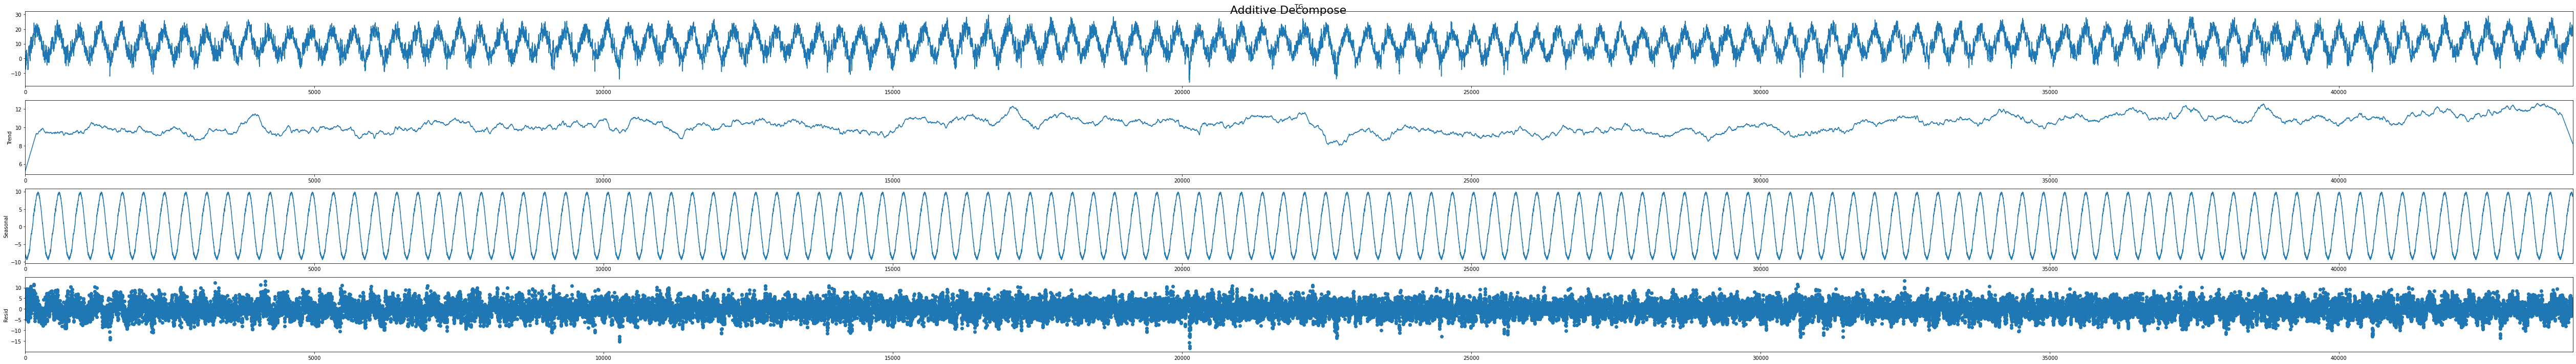

In [104]:
# Additive Decomposition
result_add = seasonal_decompose(df.TG, model='additive', extrapolate_trend=7, period = 365,two_sided=True)

plt.rcParams.update({'figure.figsize': (70,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show() 
#tpTG = data_temperature.TG

#data_temperature.TG = data_temperature.TG - result_add.seasonal

)
#tp.TG.hist(bins = 100, density = True)
#plt.plot(tpTG)


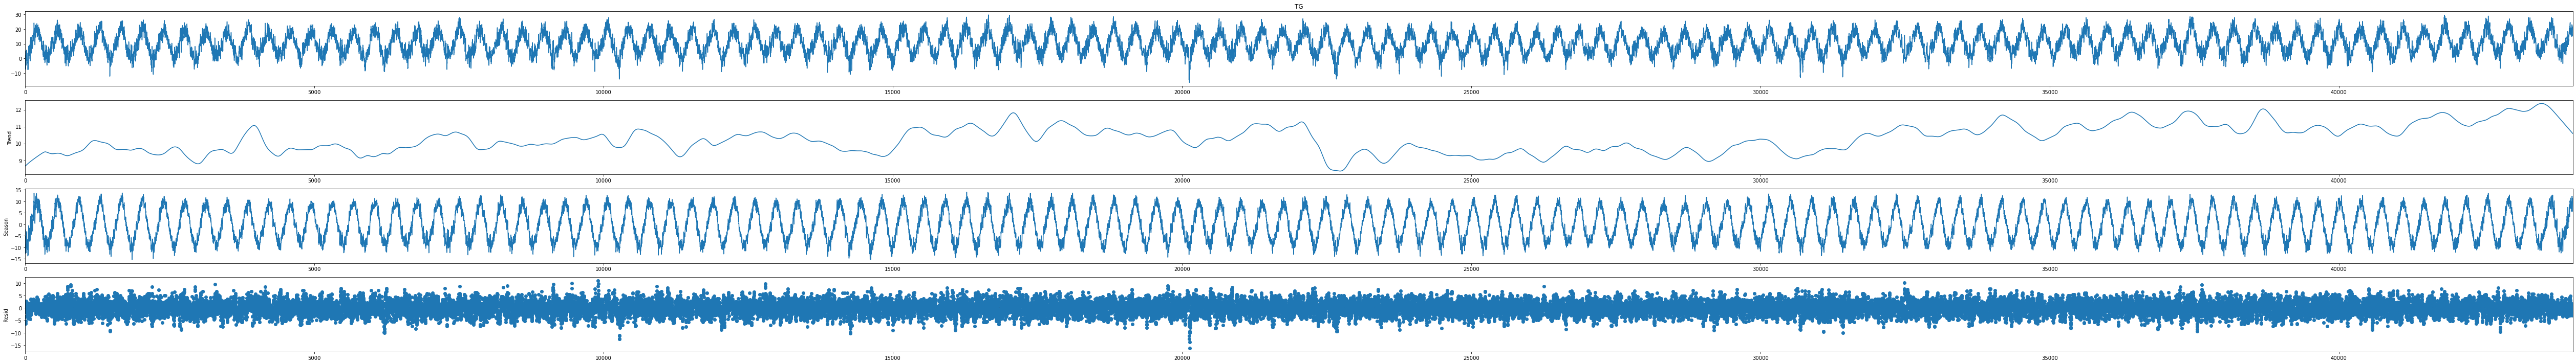

NameError: name 'tp' is not defined

In [105]:
res = STL(df.TG, period = 365).fit()
res.plot()
plt.show()


tp.TG = data_temperature.TG

tp.TG = tp.TG - res.seasonal - np.mean(tp.TG)

print(np.mean(tp.TG))
tp.TG.hist(bins = 100, density = True)

In [ ]:
# Using scipy: Subtract the line of best fit
detrended1 = sc.signal.detrend(df.TG)
trend1 = df.TG - detrended1

plt.plot(detrended1)
plt.show()
plt.figure(figsize=(20,8), dpi= 80)
plt.plot(trend1)
plt.show()

In [ ]:
# Using statmodels: Subtracting the Trend Component.

result_add = seasonal_decompose(df.TG, model='additive', extrapolate_trend='freq',period = 365)
detrended = df.TG - result_add.trend
plt.plot(detrended)
plt.figure(figsize=(20,8), dpi= 80)
plt.plot(df.TG-detrended)


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.TG, nlags=50)
print(pacf_50[:6])
# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.TG, lags=50, ax=axes[0])
plot_pacf(df.TG, lags=50, ax=axes[1])

In [123]:
#arma_mod = ARIMA(df.TG, order=(5, 0, 0),seasonal_order=(1,0,1,365)).fit()
#print(arma_mod.params)

KeyboardInterrupt: 

# Estimation de la tendance et de la saisonnalité
Nous allons ici, chercher la façon la optimale de modéliser la saisonalité et la tendance de notre time series pour ensuite pouvoir vérifier si elle est stationnaire et enfin faire du forecasting sur une time series stationaire. 

## Modélisation de la composante saisonière par moyenne par jours de l'année
On estimite la composante saisonière en prenant la moyenne de température de chaque jours de l'année à travers toutes les années. 

In [109]:
average_seasonal_component = [df[df.Day_of_year == j+1].TG.mean() for j in range(0,366)]
day = np.array(df.Day_of_year)
df['Season_TG'] = [average_seasonal_component[d-1] for d in day]
df["Seasonless_TG"] = df.TG-df.Season_TG

(0.0, 44044.0)

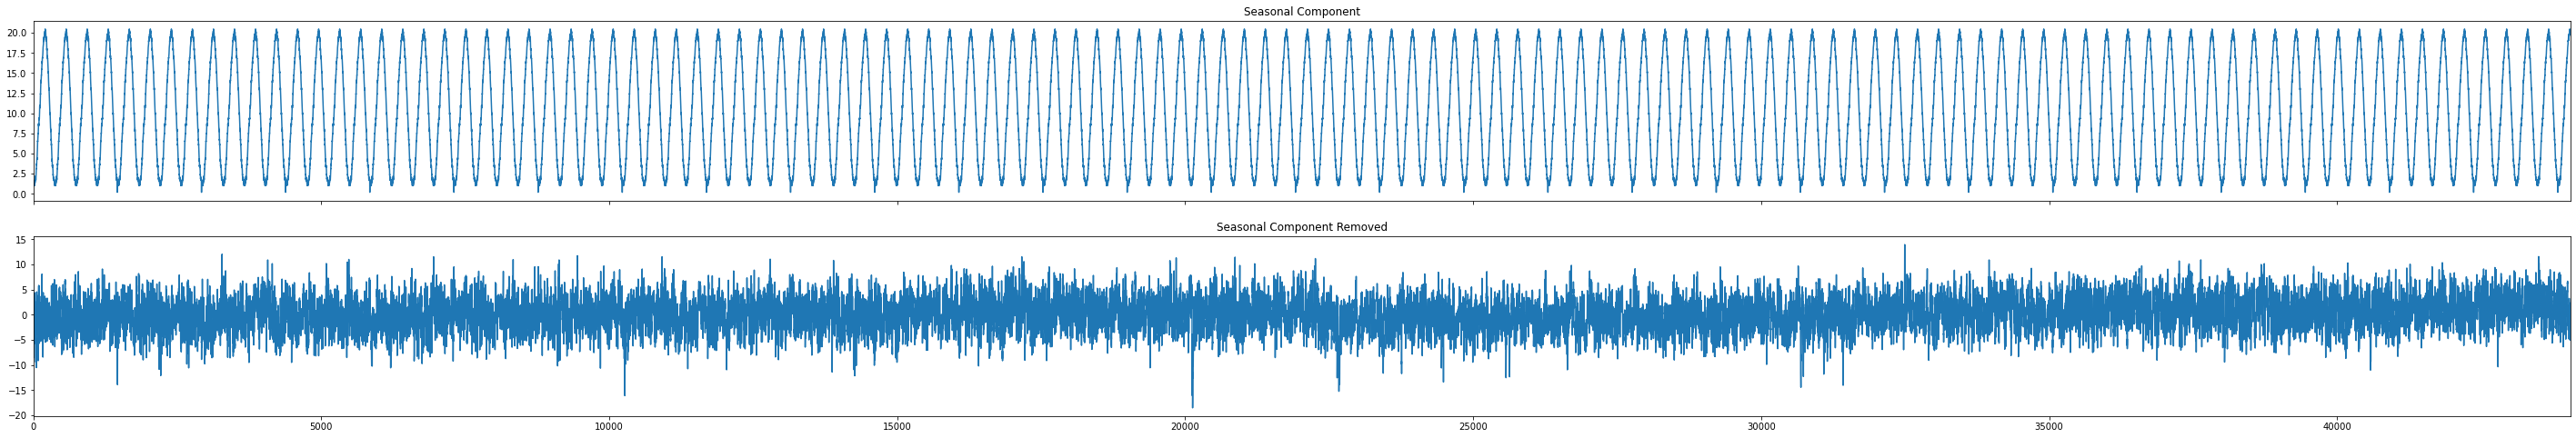

In [110]:

fig, axs = plt.subplots(2,figsize=(50,8),sharex = True)
axs[0].plot(df.Season_TG)
axs[0].set_title('Seasonal Component')
axs[1].plot(df.TG-df.Season_TG)
axs[1].set_title('Seasonal Component Removed')
plt.xlim(0,np.shape(df.Season_TG)[0])

## Modélisation de la tendance par interpolation linéaire, après avoir enlevé la saisonnalité

In [111]:
# Inutile pour le moment
def convolution_avg(X,i,l = 3):
    avg = X[max(i-l,0):min(i+l+1,np.shape(X)[0])].mean()
    return avg

#Trop de variation pour la tendance
#L = 31
#average_trend = [convolution_avg(df.TG-df.Season_TG,i,l=L) for i in range(np.shape(df.TG)[0])]

In [112]:
df["Detrended_Seasonless_TG"] = sc.signal.detrend(df.Seasonless_TG)

# trend_TG = a*t + b
i = 2
a = (df.Seasonless_TG[i+1]-df.Detrended_Seasonless_TG[i+1]) - (df.Seasonless_TG[i]-df.Detrended_Seasonless_TG[i])
b = df.Seasonless_TG[0]-df.Detrended_Seasonless_TG[0]
f_trend_lin = lambda u: a*u + b

#plt.figure(figsize=(70,8))
#plt.plot(df.Seasonless_TG-detrended, linewidth = 1)
#plt.plot(df.Seasonless_TG, linewidth = 1)

## Tests de stationarité de la Time Serie, une fois la tendance et la saisonnalité retirée

### Augmented Dickey Fuller test (ADH Test)

In ADH Test, the null hypothesis is the time series possesses a unit root and is non-stationary. So, if the P-Value in ADH test is less than the significance level, we can reject the null hypothesis. For more details on the [ADH Test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test).

In [113]:
# ADF Test 
max_lag = 7 #max_lag is the maximum lag order of the autoregressive process in the ADH Test

result_adh = adfuller(df.Detrended_Seasonless_TG, autolag='AIC',maxlag = max_lag, regression = 'c')
print('\nADH Test with without seasonality and trend :')
print(f'ADF Statistic: {result_adh[0]}')
print(f'p-value: {result_adh[1]}')
print(f'Number of lag used : {result_adh[2]}')
for key, value in result_adh[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADH Test with without seasonality and trend :
ADF Statistic: -53.47633464610306
p-value: 0.0
Number of lag used : 6
Critial Values:
   1%, -3.4304985042400804
Critial Values:
   5%, -2.8616056356283823
Critial Values:
   10%, -2.5668049357083196


Sur le test ci-dessus, nous avons tester l'hypothèse nulle ($H_{0}$ : la time serie n'est pas stationnaire et possède sur racine unitaire). Nous obtenons que nous pouvons rejetter l'hypothèse nulle sous n'importe niveau de significativité.



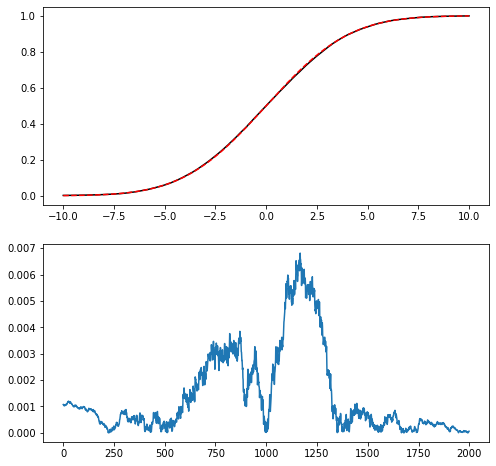

In [114]:
ecdf = ECDF(df.Seasonless_TG)
x = np.linspace(-10.,10.,2000)
plt.figure(figsize = (8,8))
plt.plot(x,ecdf(x))
std = df.Detrended_Seasonless_TG.std()

plt.subplot(211)
plt.plot(x,ecdf(x),"k")
plt.plot(x,sc.stats.norm.cdf(x,scale = std), "r--")
plt.subplot(212)
plt.plot(np.abs(ecdf(x)-sc.stats.norm.cdf(x,loc = df.Seasonless_TG.mean() ,scale = std)))

0.0104271742011708


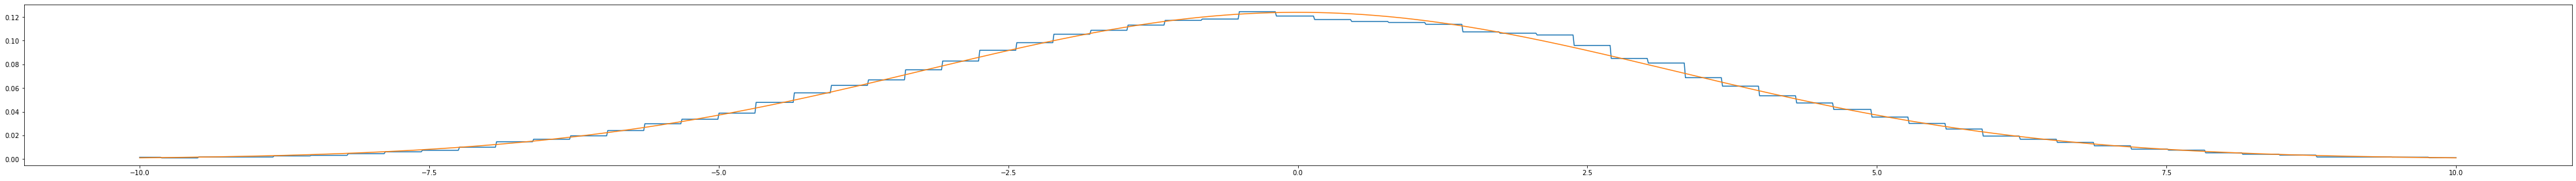

In [115]:
hist = np.histogram(df.Detrended_Seasonless_TG, bins=100)
hist_dist = sc.stats.rv_histogram(hist)
plt.subplot(211)
plt.plot(x,hist_dist.pdf(x))
plt.plot(x,sc.stats.norm.pdf(x,loc=0, scale=std))
print(max(np.abs(sc.stats.norm.pdf(x,loc=0, scale=std)-hist_dist.pdf(x))))

# Tests sur les Time Series pour tester l'hypothèse de normalité
Dans cette partie, nous allons tester une hypothèse de normalité $X\sim \mathcal{N}(\mu,\,\sigma^{2})$ sur la time serie des températures moyennes désaisonnalisé $X$.
Plus précisément, nous allons d'abord tester les hypothèses :
- $H_0: \mu > 0$
- $H_0: \mu < 0$

Cela nous permettra de savoir si 

In [116]:
T, p = sc.stats.ttest_1samp(df.Detrended_Seasonless_TG,0,alternative = "less")
print(p)

0.5000000000000042


In [119]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sc.stats.sem(a)
    h = se * sc.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [120]:
m1,m2,m3 = mean_confidence_interval(df.Detrended_Seasonless_TG)
print(m1,m2,m3)

1.6519747557404926e-16 -0.03006538095974896 0.030065380959749293
